# imax/sunrise class distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
masks = []
for f in os.listdir('/Users/reza/Career/DMLab/DKIST/frontiers_repo/data/Masks_S_v5/Train'):
    data = np.load(os.path.join('/Users/reza/Career/DMLab/DKIST/frontiers_repo/data/Masks_S_v5/Train', f))
    masks.append(data['cmask_map'])

In [3]:
for f in os.listdir('/Users/reza/Career/DMLab/DKIST/frontiers_repo/data/Masks_S_v5/Validate'):
    data = np.load(os.path.join('/Users/reza/Career/DMLab/DKIST/frontiers_repo/data/Masks_S_v5/Validate', f))
    masks.append(data['cmask_map'])

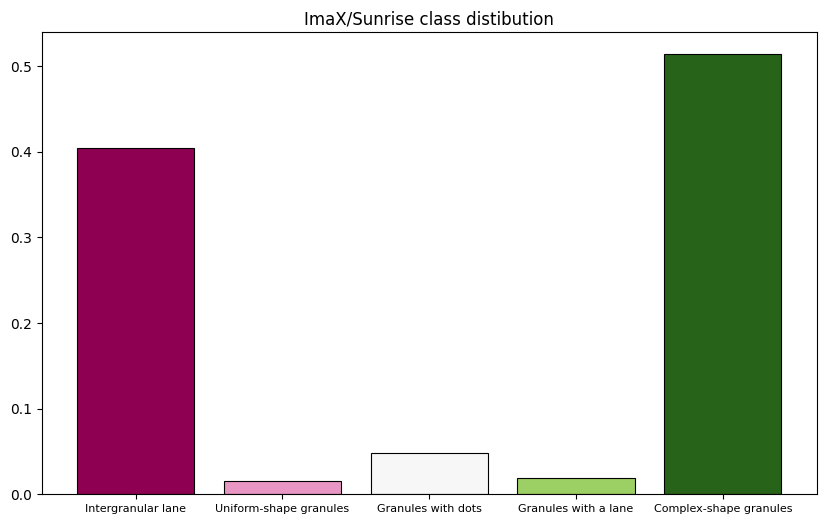

In [4]:
masks = np.array(masks)
population = np.unique(masks, return_counts=True)[1]
all = np.sum(population, dtype=np.int64)
population = population / all
classes = ['Intergranular lane', 'Uniform-shape granules', 'Granules with dots', 'Granules with a lane',
                            'Complex-shape granules']
cmap = plt.get_cmap('PiYG', len(classes))

# Generate a list of colors from the colormap
colors = cmap(np.arange(len(classes)))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, population, color=colors, edgecolor='black', linewidth=0.8)

# Add title and labels
plt.title('ImaX/Sunrise class distibution')
# plt.ylabel('Ratio of population')
plt.xticks(fontsize=8)
# Show the plot
plt.savefig('./imax_sunrise_class_dist.svg', format='svg')
plt.show()

In [5]:
def get_weights(masks):
    masks = np.array(masks)
    classes, counts = np.unique(masks, return_counts=True)
    fqs = counts / sum(counts)
    fqs = {k: v for k, v in zip(classes, fqs)}
    w = np.array([1/fqs[c] for c in sorted(classes)])
    return w / max(w)

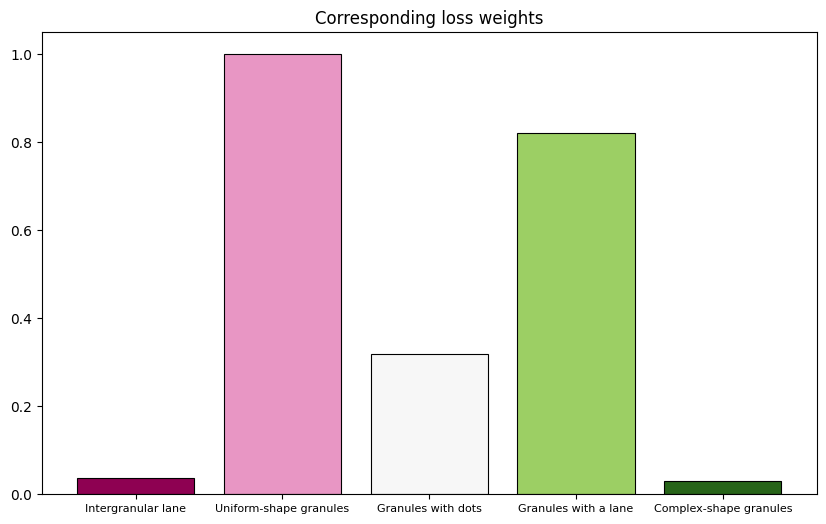

In [7]:
w = get_weights(masks)
classes = ['Intergranular lane', 'Uniform-shape granules', 'Granules with dots', 'Granules with a lane',
                            'Complex-shape granules']
cmap = plt.get_cmap('PiYG', len(classes))

# Generate a list of colors from the colormap
colors = cmap(np.arange(len(classes)))

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, w, color=colors, edgecolor='black', linewidth=0.8)

# Add title and labels
plt.title('Corresponding loss weights')
# plt.ylabel('Ratio of population')
plt.xticks(fontsize=8)
# Show the plot
plt.savefig('./imax_sunrise_loss.svg', format='svg')
plt.show()

# Plots

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
random_acc = np.load('random_acc.npy')

## UNet Focal Plots

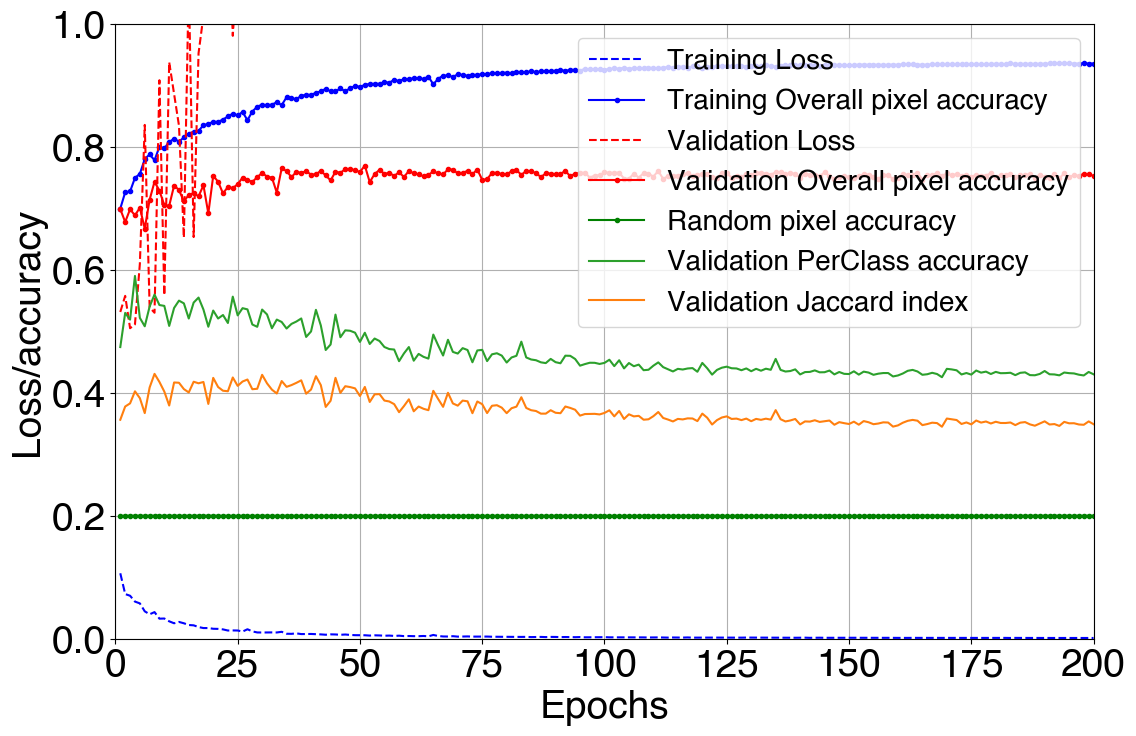

In [38]:
with open ('unet_focal.npy', 'rb') as f:    
    training_info = np.load(f, allow_pickle=True)
    metrics = np.load(f, allow_pickle=True)
    h_train_metrics = np.load(f, allow_pickle=True)
    h_val_metrics = np.load(f, allow_pickle=True)

# stats = np.load('unet_focal.npy')
plt.rcParams.update({
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 28})

plot_losses = np.array(metrics)
plt.figure(figsize=(12,8))
plt.plot(plot_losses[:,0], plot_losses[:,1], '--b')
plt.plot(plot_losses[:,0], plot_losses[:,2], '.-b')
plt.plot(plot_losses[:,0], plot_losses[:,3], '--r')
plt.plot(plot_losses[:,0], plot_losses[:,5], '.-r')
plt.plot(plot_losses[:,0], random_acc, '.-g')
plt.plot(plot_losses[:,0], plot_losses[:,6], color='tab:green')
plt.plot(plot_losses[:,0], plot_losses[:,7], color='tab:orange')
plt.xlabel('Epochs')
plt.ylabel('Loss/accuracy')
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 200.0)
plt.grid()
plt.legend(['Training Loss', 
            'Training Overall pixel accuracy', 
            'Validation Loss',
            'Validation Overall pixel accuracy', 
            'Random pixel accuracy', 
            'Validation PerClass accuracy',
            'Validation Jaccard index'], fontsize=20) # using a named size
# plt.title('SegNet - ImaX/Sunrise Focal loss')
plt.tight_layout()
plt.savefig('unet_focal.svg', format='svg')
plt.show()

## UNet iou Plots

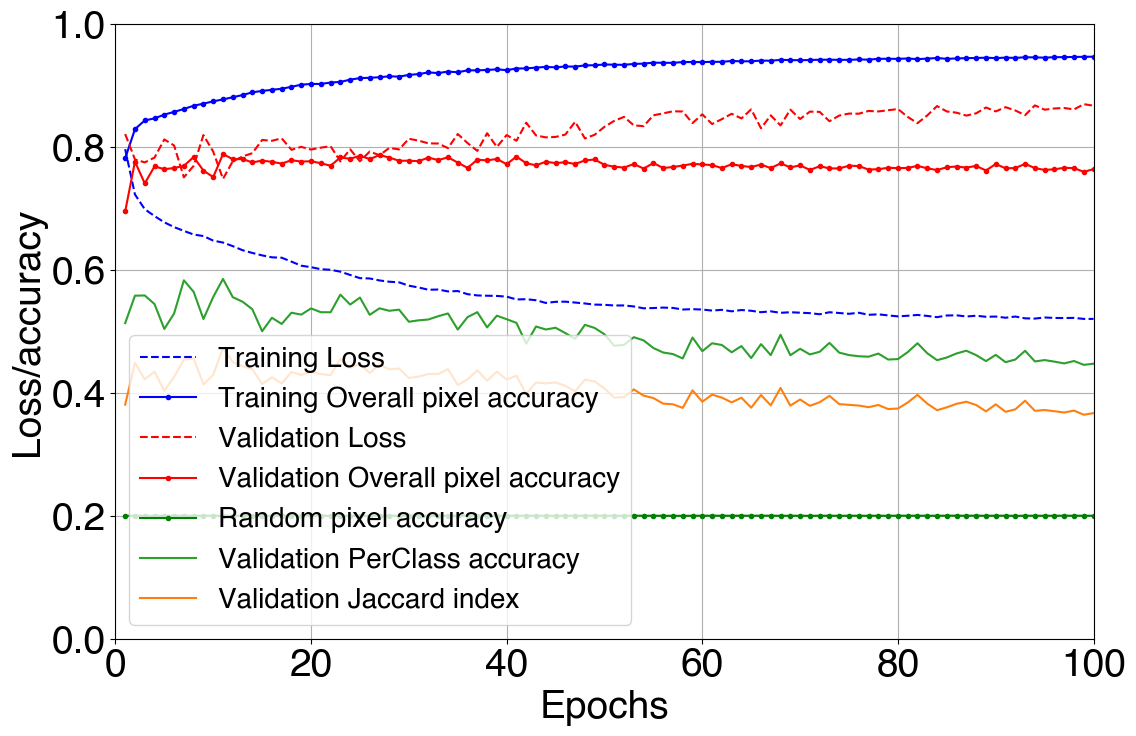

In [40]:
with open ('unet_iou.npy', 'rb') as f:    
    training_info = np.load(f, allow_pickle=True)
    metrics = np.load(f, allow_pickle=True)
    h_train_metrics = np.load(f, allow_pickle=True)
    h_val_metrics = np.load(f, allow_pickle=True)

# stats = np.load('unet_focal.npy')
plt.rcParams.update({
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 28})

plot_losses = np.array(metrics)
plt.figure(figsize=(12,8))
plt.plot(plot_losses[:,0], plot_losses[:,1], '--b')
plt.plot(plot_losses[:,0], plot_losses[:,2], '.-b')
plt.plot(plot_losses[:,0], plot_losses[:,3], '--r')
plt.plot(plot_losses[:,0], plot_losses[:,5], '.-r')
plt.plot(plot_losses[:,0], random_acc[:100], '.-g')
plt.plot(plot_losses[:,0], plot_losses[:,6], color='tab:green')
plt.plot(plot_losses[:,0], plot_losses[:,7], color='tab:orange')
plt.xlabel('Epochs')
plt.ylabel('Loss/accuracy')
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 100.0)
plt.grid()
plt.legend(['Training Loss', 
            'Training Overall pixel accuracy', 
            'Validation Loss',
            'Validation Overall pixel accuracy', 
            'Random pixel accuracy', 
            'Validation PerClass accuracy',
            'Validation Jaccard index'], fontsize=20) # using a named size
# plt.title('SegNet - ImaX/Sunrise Focal loss')
plt.tight_layout()
plt.savefig('unet_iou.svg', format='svg')
plt.show()

## SegNet Focal Plots

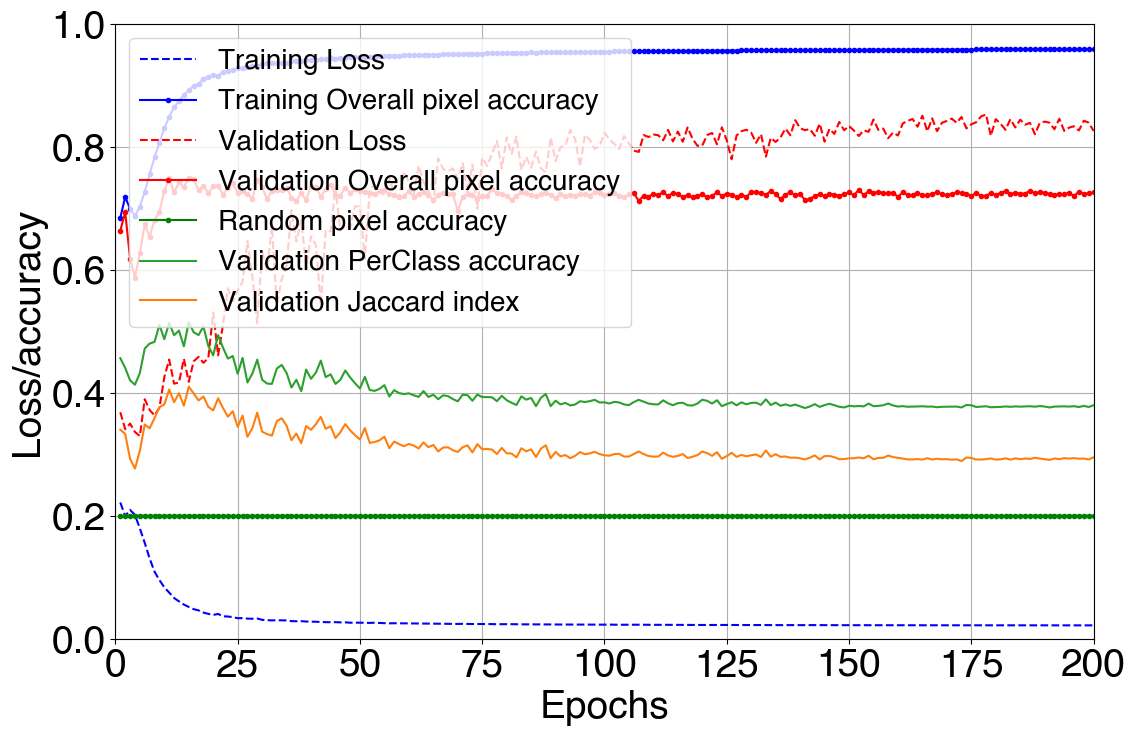

In [41]:
with open ('seg_focal.npy', 'rb') as f:    
    training_info = np.load(f, allow_pickle=True)
    metrics = np.load(f, allow_pickle=True)
    h_train_metrics = np.load(f, allow_pickle=True)
    h_val_metrics = np.load(f, allow_pickle=True)

# stats = np.load('unet_focal.npy')
plt.rcParams.update({
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 28})

plot_losses = np.array(metrics)
plt.figure(figsize=(12,8))
plt.plot(plot_losses[:,0], plot_losses[:,1], '--b')
plt.plot(plot_losses[:,0], plot_losses[:,2], '.-b')
plt.plot(plot_losses[:,0], plot_losses[:,3], '--r')
plt.plot(plot_losses[:,0], plot_losses[:,5], '.-r')
plt.plot(plot_losses[:,0], random_acc, '.-g')
plt.plot(plot_losses[:,0], plot_losses[:,6], color='tab:green')
plt.plot(plot_losses[:,0], plot_losses[:,7], color='tab:orange')
plt.xlabel('Epochs')
plt.ylabel('Loss/accuracy')
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 200.0)
plt.grid()
plt.legend(['Training Loss', 
            'Training Overall pixel accuracy', 
            'Validation Loss',
            'Validation Overall pixel accuracy', 
            'Random pixel accuracy', 
            'Validation PerClass accuracy',
            'Validation Jaccard index'], fontsize=20) # using a named size
# plt.title('SegNet - ImaX/Sunrise Focal loss')
plt.tight_layout()
plt.savefig('seg_focal.svg', format='svg')
plt.show()

## SegNet iou Plots

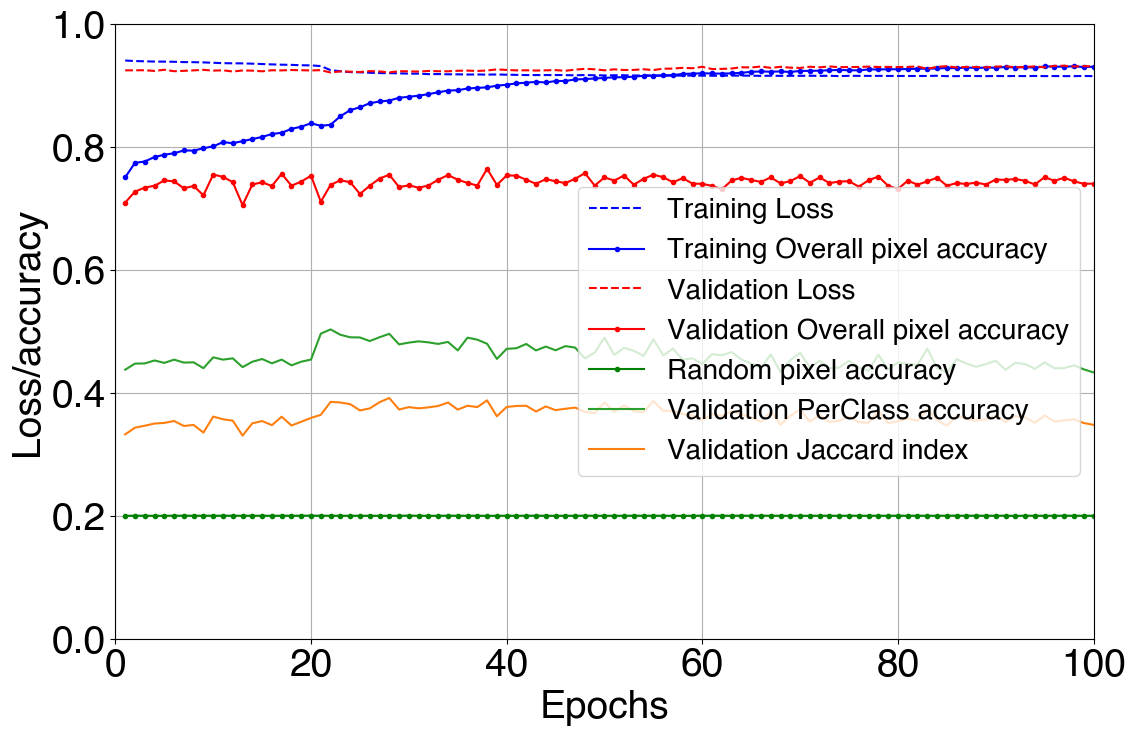

In [42]:
with open ('seg_iou.npy', 'rb') as f:    
    training_info = np.load(f, allow_pickle=True)
    metrics = np.load(f, allow_pickle=True)
    h_train_metrics = np.load(f, allow_pickle=True)
    h_val_metrics = np.load(f, allow_pickle=True)

# stats = np.load('unet_focal.npy')
plt.rcParams.update({
"font.family": "sans-serif",
"font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 28})

plot_losses = np.array(metrics)
plt.figure(figsize=(12,8))
plt.plot(plot_losses[:,0], plot_losses[:,1], '--b')
plt.plot(plot_losses[:,0], plot_losses[:,2], '.-b')
plt.plot(plot_losses[:,0], plot_losses[:,3], '--r')
plt.plot(plot_losses[:,0], plot_losses[:,5], '.-r')
plt.plot(plot_losses[:,0], random_acc[:100], '.-g')
plt.plot(plot_losses[:,0], plot_losses[:,6], color='tab:green')
plt.plot(plot_losses[:,0], plot_losses[:,7], color='tab:orange')
plt.xlabel('Epochs')
plt.ylabel('Loss/accuracy')
plt.ylim(0.0, 1.0)
plt.xlim(0.0, 100.0)
plt.grid()
plt.legend(['Training Loss', 
            'Training Overall pixel accuracy', 
            'Validation Loss',
            'Validation Overall pixel accuracy', 
            'Random pixel accuracy', 
            'Validation PerClass accuracy',
            'Validation Jaccard index'], fontsize=20) # using a named size
# plt.title('SegNet - ImaX/Sunrise Focal loss')
plt.tight_layout()
plt.savefig('seg_iou.svg', format='svg')
plt.show()